<a href="https://colab.research.google.com/github/rosenlyd/Projekt-USU/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/My Drive/Colab Notebooks/creditcard.csv'

df = pd.read_csv(dataset_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0.0
25691.16


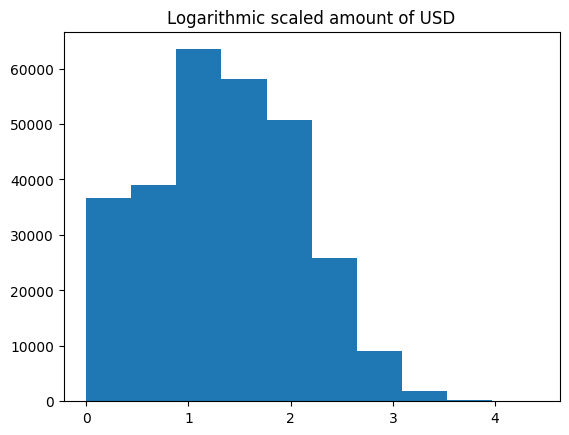

In [6]:
amount = df['Amount']
print(amount.min())
print(amount.max())
log_amount = np.log10(amount+1)

plt.hist(log_amount)
plt.title('Logarithmic scaled amount of USD')
plt.show()

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**SVM without standard scaling:**


In [8]:
df = df.drop("Time", axis=1)
df = df.drop('Amount', axis = 1)

In [9]:
cols = df.columns.to_list()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

X = df[cols]
Y = df['Class']

<Axes: xlabel='Class', ylabel='count'>

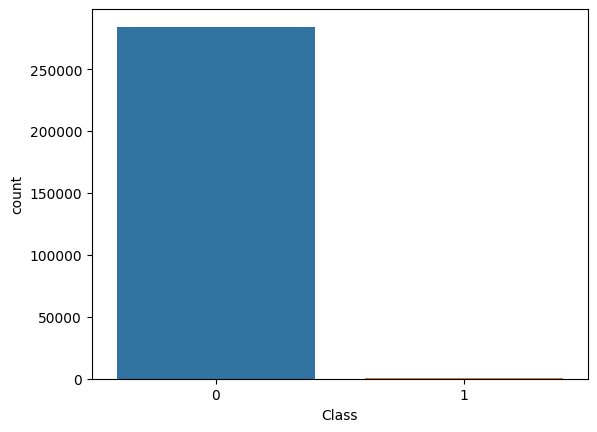

In [11]:
sns.countplot(x="Class", data=df)

In [10]:
undersample = RandomUnderSampler(sampling_strategy=0.98)
X_under, Y_under = undersample.fit_resample(X,Y)

test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

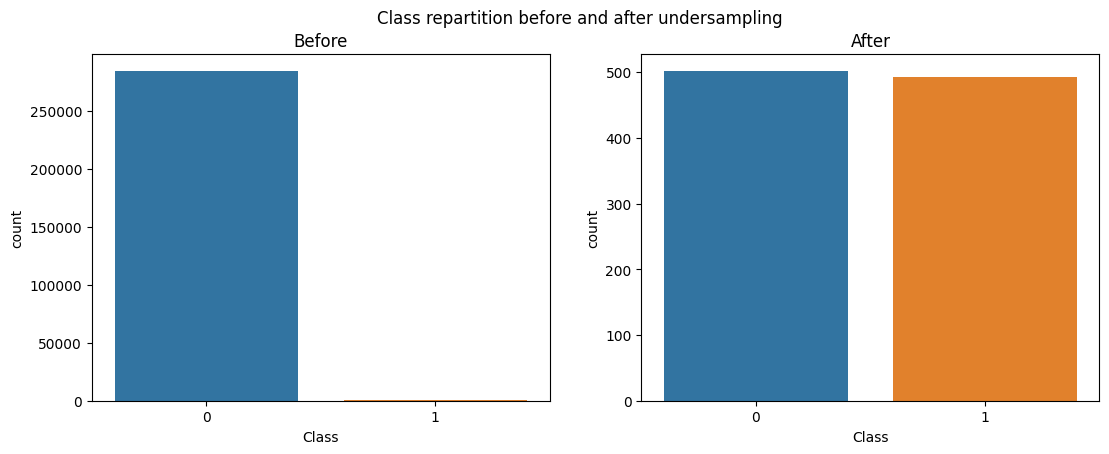

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=42)

In [13]:
model = SVC()

In [18]:
model.fit(X_train, y_train)

y_pred = model.predict(X)
accuracy = accuracy_score(Y, y_pred)

In [19]:
print("Accuracy SVM:",metrics.accuracy_score(Y, y_pred))
print("Precision SVM:",metrics.precision_score(Y, y_pred))
print("Recall SVM:",metrics.recall_score(Y, y_pred))
print("F1 Score SVM:",metrics.f1_score(Y, y_pred))

Accuracy SVM: 0.9844315624264853
Precision SVM: 0.09039900249376559
Recall SVM: 0.8841463414634146
F1 Score SVM: 0.16402714932126697


In [20]:
matrix_svm = confusion_matrix(Y, y_pred)

print(matrix_svm)

[[279938   4377]
 [    57    435]]


**SVM with standard scaling:**


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

In [28]:
undersample = RandomUnderSampler(sampling_strategy=0.98)
X_under, Y_under = undersample.fit_resample(scaled_X,Y)



In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=42)

In [30]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [31]:
y_pred = model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [32]:
print("Accuracy SVM:",metrics.accuracy_score(Y, y_pred))
print("F1 SVM:",metrics.f1_score(Y, y_pred))
matrix_svm = confusion_matrix(Y, y_pred)

Accuracy SVM: 0.9762295168306959
F1 SVM: 0.11526398327234709


In [33]:
print(matrix_svm)

[[277596   6719]
 [    51    441]]


**SVM with standard scaling and Gaussian kernel**

In [34]:
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [35]:
y_pred = model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [36]:
print("Accuracy SVM:",metrics.accuracy_score(Y, y_pred))
print("F1 SVM:",metrics.f1_score(Y, y_pred))
matrix_svm = confusion_matrix(Y, y_pred)
print(matrix_svm)

Accuracy SVM: 0.9762295168306959
F1 SVM: 0.11526398327234709
[[277596   6719]
 [    51    441]]
